## Data Mining and Machine Learning 
### Logistic Regression
###  Libraries: scikit-learn and h2o
#### Edgar Acuna
#### November 2018

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
h2o.connect()
#h2o.no_progress()


C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Connecting to H2O server at http://localhost:54321... successful.


H2O cluster uptime:,9 days 4 hours 28 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_started_from_R_edgar2017_gsn168
H2O cluster total nodes:,1
H2O cluster free memory:,1.580 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

### Example 1: Predicting the final grade in a class

In [2]:
df=pd.read_csv("c://PW-PR/eje1dis.csv")
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
databin=df[['E1','pass']]
print databin.head()

    E1  pass
0   96     1
1   96     1
2  100     1
3   93     1
4   90     1


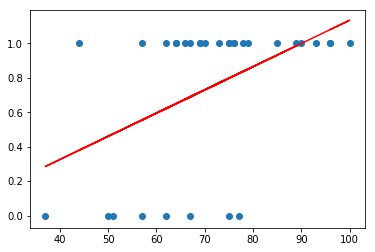

In [3]:
#Trazando la linea de regresion sobre el plot de puntos
x1=databin.iloc[:,0]
x2=databin.iloc[:,1]
plt.scatter(x1,x2)
plt.plot(x1, np.poly1d(np.polyfit(x1, x2, 1))(x1),color='red')

plt.show()

### Applying Logistic Regression to predict Final Grade. Use of sckikit-learn

In [4]:
#Applying Logistic Regression to predict Final Grade
X=df[['E1',"E2"]]
y3=df['pass']
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(X, y3)
print "Coeficientes del modelo", model.coef_

Coeficientes del modelo [[ 0.84415919  0.5817652 ]]


In [5]:
#Accuracy
model.score(X,y3)

1.0

In [6]:
# Tasa de precision
pred = model.predict(X)
print(pred)
pred1=model.predict_proba(X)
print(pred1[0:5,:])
print(classification_report(y3, pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



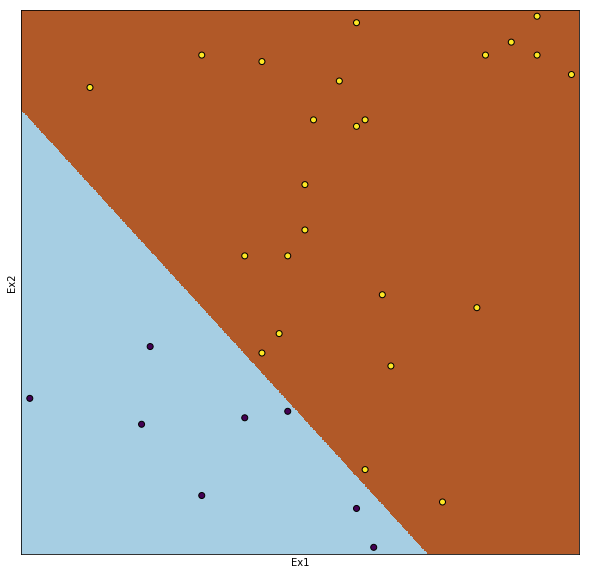

In [7]:
from matplotlib.colors import ListedColormap
logis = LogisticRegression(solver="newton-cg")
X1=df.iloc[:,0:2].as_matrix()
y1=df['pass'].as_matrix()
logis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=logis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression using library H2o

In [8]:
df1=h2o.H2OFrame(df)
myx=['E1','E2']
myy='Nota'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= df1)
y_pred=glm_model.predict(df1)
print (y_pred['predict']==df1['Nota']).sum()/float(len(df1))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\h2o\job.py:69: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


glm prediction progress: |████████████████████████████████████████████████| 100%
1.0


### Example 2. Logistic Regression for Diabetes using sckit-learn

In [9]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#The response  variable must be binary (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
#Haciendo la regresion logistica y calculando su precision
model = LogisticRegression()
model = model.fit(X, y)
print model.coef_

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[  1.17057358e-01   2.83881555e-02  -1.68873034e-02   7.55876596e-04
   -6.42924257e-04   5.97710296e-02   6.77534932e-01   7.24147639e-03]]


In [10]:
# Accuracy rate
model.score(X, y)

0.77473958333333337

In [11]:
predictions = model.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

   micro avg       0.77      0.77      0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



### Logistic regression for Diabetes  using the H2o library

In [12]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy='C9'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= diabetes)
y_pred=glm_model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
0.766927083333
